<a href="https://colab.research.google.com/github/Kalana-Lakshan/tensorflow-learning/blob/main/regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.19.0'

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!nvidia-smi

Wed Dec 24 02:34:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P0             29W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

regression with tensorflow

In [5]:
!pip install opendatasets

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [7]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kalanalakshan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 28.4MB/s]

In [8]:
data = pd.read_csv("random-linear-regression/test.csv")

In [9]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [10]:
x = data["x"]
y = data["y"]

In [11]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [12]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


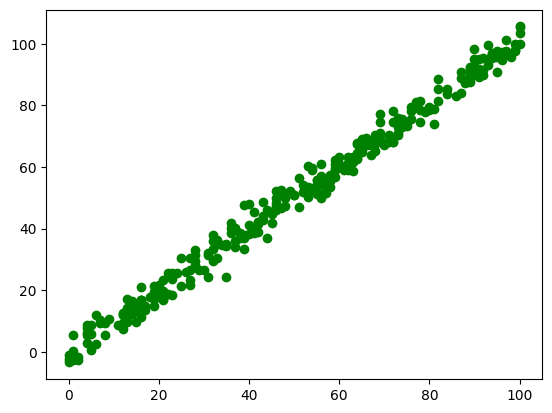

In [20]:
plt.scatter(x,y,c='g')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

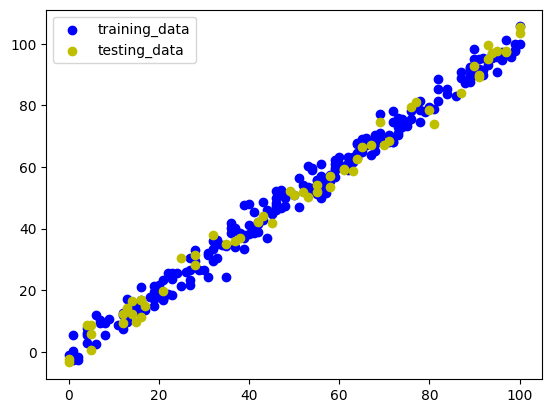

In [25]:
plt.scatter(x_train,y_train,c="b",label="training_data")
plt.scatter(x_test,y_test,c="y",label="testing_data")
plt.legend()
plt.show()

Model Building

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),

    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.05),
              metrics=["mae"])
epoch_number = 30
history = model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=epoch_number)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 99.0170 - mae: 99.0170  
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.2837 - mae: 27.2837 
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.2913 - mae: 11.2913
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9465 - mae: 7.9465 
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2180 - mae: 10.2180 
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4320 - mae: 4.4320 
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7576 - mae: 9.7576 
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1855 - mae: 8.1855   
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5005 - mae: 4.5005 
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7254 - mae: 3.7254 
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9890 - mae: 3.9890 
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5822 - mae: 2.5822 
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [66]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

In [67]:
y_predictions = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [68]:
y_predictions[0:5]

array([[91.80745  ],
       [77.44602  ],
       [95.91071  ],
       [ 4.6130886],
       [92.83326  ]], dtype=float32)

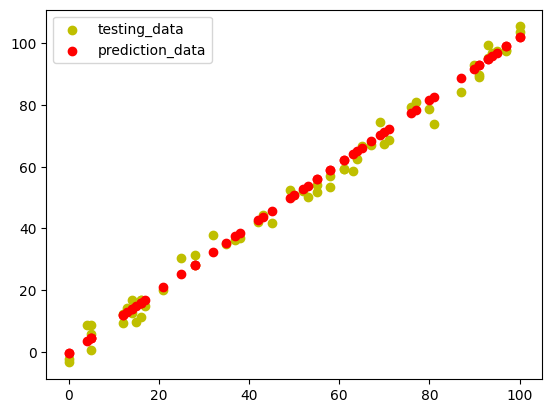

In [69]:
#plt.scatter(x_train,y_train,c="b",label="training_data")
plt.scatter(x_test,y_test,c="y",label = "testing_data")
plt.scatter(x_test,y_predictions,c="r",label="prediction_data")
plt.legend()
plt.show()

In [71]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5700 - mae: 2.5700


[2.584556818008423, 2.584556818008423]

In [73]:
history.history

{'loss': [78.55203247070312,
  18.443143844604492,
  12.61903190612793,
  8.538925170898438,
  7.863594055175781,
  4.479191303253174,
  9.379193305969238,
  6.096680164337158,
  3.996520757675171,
  4.133777141571045,
  3.318204164505005,
  2.9045610427856445,
  3.9270598888397217,
  4.062723159790039,
  6.820701599121094,
  4.579209327697754,
  8.388223648071289,
  8.069069862365723,
  3.9454236030578613,
  3.6230483055114746,
  3.810267925262451,
  3.3578226566314697,
  3.239543914794922,
  3.39575457572937,
  3.1817121505737305,
  3.356285333633423,
  3.119877815246582,
  3.608614206314087,
  2.8222739696502686,
  2.513744592666626],
 'mae': [78.55203247070312,
  18.443143844604492,
  12.61903190612793,
  8.538925170898438,
  7.863594055175781,
  4.479191303253174,
  9.379193305969238,
  6.096680164337158,
  3.996520757675171,
  4.133777141571045,
  3.318204164505005,
  2.9045610427856445,
  3.9270598888397217,
  4.062723159790039,
  6.820701599121094,
  4.579209327697754,
  8.3882

In [74]:
x_range = range(1,epoch_number+1)
loss = history.history["loss"]

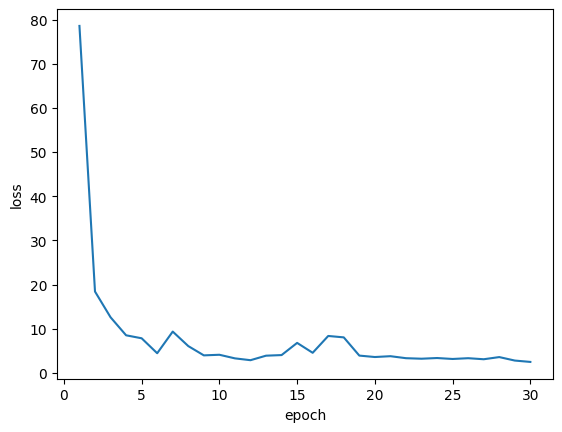

In [76]:
plt.plot(x_range,loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [78]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"weights: {weights} \n biases: {biases}")

weights: [[-9.52639896e-03  1.63199574e-01  7.15408102e-02  1.95489936e-02
  -4.81329933e-02 -3.46727367e-03  1.52263850e-01  1.83921715e-03
   3.86860920e-03 -5.81835862e-04  3.87417909e-04  1.17170200e-01
  -1.00612909e-01  4.15853225e-03 -3.32741952e-03 -2.24987343e-01
  -1.86959863e-01  4.79189260e-03 -3.82146128e-02 -6.48816451e-02
   6.42381702e-03 -1.34071745e-02  3.27452235e-02 -1.58160813e-02
   1.54846208e-03 -4.39506955e-02 -5.24234073e-03  3.59493867e-02
  -4.41131787e-03 -1.19811788e-01 -3.32132459e-01 -9.36936066e-02
   1.21798307e-01  1.53674670e-02  8.24689642e-02 -7.27471721e-04
  -7.62718171e-02  4.52467101e-03  1.34727195e-01 -3.87330260e-03
   2.73066282e-01 -1.49484098e-01  3.42998385e-01 -4.42304416e-03
   6.20391499e-03  8.70749261e-03  2.51821429e-02 -2.29483750e-02
   9.55832284e-03  6.58651218e-02 -3.80452946e-02 -1.80824995e-01
  -2.89135438e-04  2.59449752e-03 -1.67438444e-02 -5.06656654e-02
   1.77954733e-02  1.37631537e-03  4.93618986e-03  5.15957922e-03
 